In [1]:
import typing
import json

import numpy
import pandas 

import scipy
import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import seaborn

import llm_questionnaires as llmq

In [2]:
MODELS: typing.List[str] = llmq.CONSTANTS.MODELS[::2]
MODELS

['llama3.1-8b', 'mistral-7b', 'qwen2.5-7b']

In [3]:
COLUMNS: typing.List[str] = [
    [str(quest["dimension"][:2].upper()) + str(quest["dimension"][4].upper()) + str(quest["id"]) for quest in
    json.load(open("../../../data/humor_styles/questionnaire.json"))[0]["questions"]]
][0]
COLUMNS

['AFL1',
 'SEE2',
 'AGE3',
 'SED4',
 'AFL5',
 'SEE6',
 'AGE7',
 'SED8',
 'AFL9',
 'SEE10',
 'AGE11',
 'SED12',
 'AFL13',
 'SEE14',
 'AGE15',
 'SED16',
 'AFL17',
 'SEE18',
 'AGE19',
 'SED20',
 'AFL21',
 'SEE22',
 'AGE23',
 'SED24',
 'AFL25',
 'SEE26',
 'AGE27',
 'SED28',
 'AFL29',
 'SEE30',
 'AGE31',
 'SED32']

In [4]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **llmq.evaluation.read_populations("data/base", MODELS, COLUMNS),
    "human_full": (
        pandas.read_csv("../../../data/humor_styles/survey.csv")
        .rename_axis(index="participant")
        .filter(regex=r'Q\d+', axis=1)
        .replace(-1, None)
        .apply(pandas.to_numeric, errors="coerce")
        .map(lambda y: {x: xh for x, xh in zip(range(1, 6), reversed(range(1, 6)))}.get(y))
        .set_axis(COLUMNS, axis=1)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, len(COLUMNS))), columns=COLUMNS)
        .rename_axis(index="participant")
        .set_axis(COLUMNS, axis=1)
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'mistral-7b', 'qwen2.5-7b', 'human_full', 'random'])

In [5]:
raw["llama3.1-8b"]

,AFL1,SEE2,AGE3,SED4,AFL5,SEE6,AGE7,SED8,AFL9,SEE10,...,AGE23,SED24,AFL25,SEE26,AGE27,SED28,AFL29,SEE30,AGE31,SED32
participant,,,,,,,,,,,,,,,,,,,,,
0,5.0,5.0,5.0,5.0,NaN,1.0,5.0,1.0,4.0,1.0,...,5.0,2.0,4.0,1.0,5.0,3.0,3.0,2.0,1,2.0
1,4.0,4.0,4.0,5.0,5.0,2.0,5.0,1.0,4.0,2.0,...,5.0,NaN,4.0,3.0,5.0,2.0,4.0,4.0,1,5.0
2,3.0,3.0,2.0,4.0,1.0,3.0,5.0,1.0,4.0,1.0,...,5.0,3.0,5.0,3.0,5.0,2.0,3.0,NaN,5,1.0
3,3.0,5.0,4.0,2.0,5.0,3.0,5.0,1.0,4.0,1.0,...,5.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5,1.0
4,5.0,5.0,4.0,5.0,4.0,2.0,5.0,1.0,4.0,3.0,...,4.0,1.0,5.0,1.0,5.0,2.0,5.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.0,3.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,1.0,...,5.0,4.0,4.0,3.0,4.0,2.0,5.0,3.0,1,5.0
246,3.0,3.0,4.0,4.0,5.0,2.0,5.0,2.0,4.0,3.0,...,5.0,NaN,3.0,1.0,5.0,NaN,3.0,3.0,4,5.0
247,4.0,5.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,NaN,...,5.0,2.0,4.0,2.0,5.0,1.0,5.0,3.0,1,5.0


In [6]:
for key, values in raw.items():
    values.to_csv(f"reports/raw.{key}.csv", index=False)

In [7]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)


nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b AFL1    250.0      3.0  4.004049  0.069913  4.141076  3.867021   
            SEE2    250.0      8.0  3.842975  0.070276  3.980713  3.705237   
            AGE3    250.0      4.0  3.443089  0.078215  3.596387  3.289792   
            SED4    250.0      2.0  4.205645  0.063179  4.329475  4.081816   
            AFL5    250.0     11.0  3.543933  0.091985  3.724220  3.363646   
...                   ...      ...       ...       ...       ...       ...   
random      SED28  1000.0      0.0  1.932000  0.044287  2.018801  1.845199   
            AFL29  1000.0      0.0  2.019000  0.044097  2.105429  1.932571   
            SEE30  1000.0      0.0  2.007000  0.044687  2.094585  1.919415   
            AGE31  1000.0      0.0  1.998000  0.045696  2.087562  1.908438   
            SED32  1000.0      0.0  2.058000  0.044459  2.145138  1.970862   

                        std   iqr  iqr_normal       mad  ...  median   1%  \
llama3.1-8b AFL1   1.098772  2.00    1.482602  0.887082  ...     4.0  1.0   
            SEE2   1.093233  2.00    1.482602  0.995151  ...     4.0  2.0   
            AGE3   1.226748  2.75    2.038578  1.092670  ...     4.0  1.0   
            SED4   0.994951  1.00    0.741301  0.762324  ...     4.0  1.0   
            AFL5   1.422048  3.00    2.223903  1.293185  ...     3.0  1.0   
...                     ...   ...         ...       ...  ...     ...  ...   
random      SED28  1.400478  2.00    1.482602  1.195016  ...     2.0  0.0   
            AFL29  1.394483  2.00    1.482602  1.182838  ...     2.0  0.0   
            SEE30  1.413134  2.00    1.482602  1.198400  ...     2.0  0.0   
            AGE31  1.445020  2.00    1.482602  1.242372  ...     2.0  0.0   
            SED32  1.405921  2.00    1.482602  1.198440  ...     2.0  0.0   

                    5%  10%  25%  50%   75%  90%  95%  99%  
llama3.1-8b AFL1   2.0  2.6  3.0  4.0  5.00  5.0  5.0  5.0  
            SEE2   2.0  3.0  3.0  4.0  5.00  5.0  5.0  5.0  
            AGE3   2.0  2.0  2.0  4.0  4.75  5.0  5.0  5.0  
            SED4   2.0  3.0  4.0  4.0  5.00  5.0  5.0  5.0  
            AFL5   1.0  2.0  2.0  3.0  5.00  5.0  5.0  5.0  
...                ...  ...  ...  ...   ...  ...  ...  ...  
random      SED28  0.0  0.0  1.0  2.0  3.00  4.0  4.0  4.0  
            AFL29  0.0  0.0  1.0  2.0  3.00  4.0  4.0  4.0  
            SEE30  0.0  0.0  1.0  2.0  3.00  4.0  4.0  4.0  
            AGE31  0.0  0.0  1.0  2.0  3.00  4.0  4.0  4.0  
            SED32  0.0  0.0  1.0  2.0  3.00  4.0  4.0  4.0  

[160 rows x 31 columns]

In [8]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human_full"][["mean", "std"]].iterrows()
    ], axis=1), columns=range(1,len(COLUMNS) + 1))
    .rename_axis(index="participant")
)

In [9]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:634: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


count
                            f_oneway_significant       
llama3.1-8b   llama3.1-8b   True                     21
                            False                    11
              mistral-7b    False                    24
                            True                      8
              qwen2.5-7b    False                    26
...                                                 ...
human_sampled qwen2.5-7b    True                      6
              human_full    False                    32
              random        False                    31
                            True                      1
              human_sampled True                     32

[68 rows x 1 columns]

In [10]:
sim = (
    llmq.evaluation.apply_calc_similarity(raw)
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
    )
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))

\begin{tabular}{lrrrrrr}
\toprule
level_1 & \rotatebox{65}{random} & \rotatebox{65}{human\_sampled} & \rotatebox{65}{human\_full} & \rotatebox{65}{llama3.1-8b} & \rotatebox{65}{mistral-7b} & \rotatebox{65}{qwen2.5-7b} \\
level_0 &  &  &  &  &  &  \\
\midrule
random &  &  &  &  &  &  \\
human\_sampled & 0.053 &  &  &  &  &  \\
human\_full & -0.016 & -0.010 &  &  &  &  \\
llama3.1-8b & -0.022 & 0.071 & -0.065 &  &  &  \\
mistral-7b & 0.013 & 0.028 & 0.073 & 0.035 &  &  \\
qwen2.5-7b & 0.085 & 0.018 & 0.046 & 0.101 & 0.047 &  \\
\bottomrule
\end{tabular}



<Axes: xlabel='level_1', ylabel='level_0'>

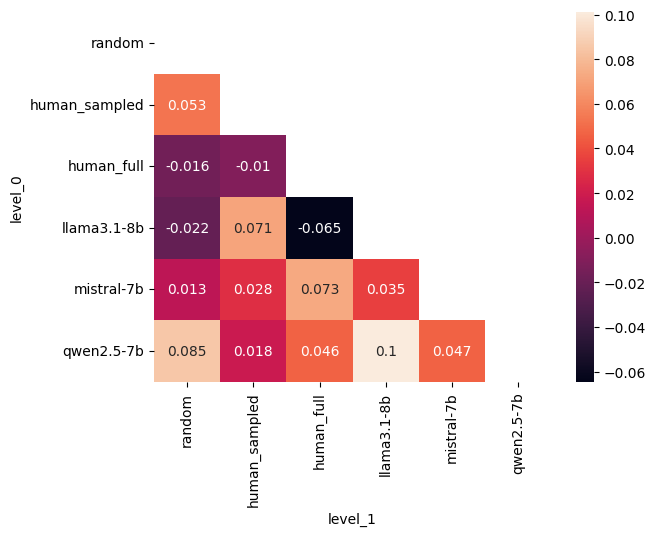

In [11]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [12]:
human_chunked = {
    f"{n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human_full"].sample(frac=1.0), 10), start=1)
}

sim = (
    llmq.evaluation.apply_calc_similarity(human_chunked)
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))

\begin{tabular}{lrrrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{01} & \rotatebox{65}{02} & \rotatebox{65}{03} & \rotatebox{65}{04} & \rotatebox{65}{05} & \rotatebox{65}{06} & \rotatebox{65}{07} & \rotatebox{65}{08} & \rotatebox{65}{09} & \rotatebox{65}{10} \\
level_0 &  &  &  &  &  &  &  &  &  &  \\
\midrule
01 &  &  &  &  &  &  &  &  &  &  \\
02 & 0.834 &  &  &  &  &  &  &  &  &  \\
03 & 0.857 & 0.837 &  &  &  &  &  &  &  &  \\
04 & 0.831 & 0.822 & 0.814 &  &  &  &  &  &  &  \\
05 & 0.869 & 0.833 & 0.826 & 0.825 &  &  &  &  &  &  \\
06 & 0.843 & 0.833 & 0.835 & 0.828 & 0.841 &  &  &  &  &  \\
07 & 0.856 & 0.844 & 0.837 & 0.847 & 0.818 & 0.849 &  &  &  &  \\
08 & 0.849 & 0.819 & 0.811 & 0.822 & 0.820 & 0.824 & 0.866 &  &  &  \\
09 & 0.838 & 0.841 & 0.824 & 0.804 & 0.837 & 0.832 & 0.836 & 0.857 &  &  \\
10 & 0.794 & 0.815 & 0.800 & 0.817 & 0.804 & 0.823 & 0.818 & 0.804 & 0.824 &  \\
\bottomrule
\end{tabular}



/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
